In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def load_dataset(name):
    return np.loadtxt(name)

In [3]:
def euclidean(a,b):
    return np.linalg.norm(a-b)

In [4]:
def kmeans(k,dataset,epsilon=0):
    history_centroids = []
    num_instances,num_features = dataset.shape
    
    #Choose k centroids randomly
    centroids = dataset[np.random.randint(0,num_instances-1,k)]
    
    history_centroids.append(centroids)
    
    old_centroids = np.zeros(centroids.shape)
    
    belongs_to = np.zeros((num_instances,1))
    
    norm = euclidean(centroids,old_centroids)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = euclidean(centroids,old_centroids)
        
        for instance_index,instance in enumerate(dataset):
            
            dist_vect = np.zeros((k,1))
            
            for centroid_index,centroid in enumerate(centroids):
                dist_vect[centroid_index] = euclidean(centroid,instance)
                
            belongs_to[instance_index] = np.argmin(dist_vect)    
    
        temp_centroids = np.zeros((k,num_features))
        for index in range(len(centroids)):
            instance_close = [i for i in range(len(belongs_to)) if belongs_to[i]==index]
            centroid = np.mean(dataset[instance_close],axis=0)
            temp_centroids[index,:] = centroid
        
        old_centroids = centroids
        centroids = temp_centroids
        history_centroids.append(temp_centroids)
        
    return history_centroids,centroids,belongs_to        

In [5]:
def plot(dataset,belongs_to):
    colors = ['r','g']
    fig,ax = plt.subplots()
    
    for index in range(len(dataset[0])):
        instance_close = [i for i in range(len(belongs_to)) if belongs_to[i]==index]
        
        for instance_index in instance_close:
            ax.plot(dataset[instance_index][0],dataset[instance_index][1],(colors[index]+'o'))
    plt.show()

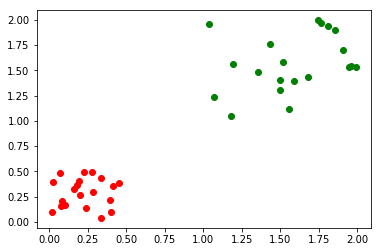

In [6]:
dataset = load_dataset('/home/taha/Documents/ML/durudataset.txt')
history_centroids,centroids,belongs_to = kmeans(2,dataset)
plot(dataset,belongs_to)